In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

In [8]:
communes = pd.read_excel("commune.xlsx")

quests = pd.read_csv("quest.csv")

enrolls = pd.read_csv("enroll.csv")

ords = pd.read_csv("ord.csv")

transactions = pd.read_csv("transaction.csv")

study_domains = pd.read_csv("study_domain.csv")

technologies = pd.read_csv("technology.csv")

industries = pd.read_csv("industry.csv")
quests.head(5)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,male,17/05/1996,ht0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601
3,3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601
4,4,male,20/07/1997,ht0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601


In [9]:
#let's create age variable

quests["dob"].replace({"3 aout 1977" : "03/08/1977"}, inplace=True)

def takeDate(x):
    x = x.str[:10]
    return pd.to_datetime(x)
#quests["Application date"] = takeDate(quests["Application date"])


dates = ["created_at", "dob"]

for _ in dates:
    quests[_] = takeDate(quests[_])

quests["age"] = (quests["created_at"]-quests["dob"])//365

def convAge(x):
    try:
        x = int(x)
        if x <=15:
            x = np.nan
    except ValueError:
        x = np.nan
    return x


quests["age"] = quests["age"].apply(lambda x: convAge(str(x)[:2]))

#quests["Application Da"] = quests["age"].apply(lambda x: str(x)[:10])
#



In [10]:
#Merging quests with communes into questsD
communes.head()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


In [11]:
communes["Commune_Id"] = communes["Commune_Id"].str.lower()

questsD = pd.merge(quests, communes[["Commune_Id", "Commune_en", "Departement"]],
        left_on="commune", right_on="Commune_Id", how="left")

# Rename
questsD = questsD.rename(columns={"Commune_en": "communeName", "created_at": "application_date"})

In [12]:
enrolls.head()

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,31987560,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-15T00:53:06.499Z,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,35616451,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-18T18:38:55.683Z,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,35390649,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-21T14:45:06.528Z,NaN


In [13]:
print(sum(enrolls["created_at"].isna()))

0


In [14]:
ords.head()

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636,0,0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601


In [15]:
transactions.head()

,Unnamed: 0,created_at,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160
2,2,2021-03-08T18:52:09.147Z,2021-03-08T18:52:09.147Z,40973512,1047613,4645070622
3,3,2021-03-08T19:06:32.837Z,2021-03-08T19:06:32.837Z,41177453,1047613,4645208830
4,4,2021-03-08T22:10:00.796Z,2021-03-08T22:10:00.796Z,40797121,1047613,4646815401


In [16]:
enrolls = enrolls.rename(columns={"created_at": "enroll_date"})

#create is_enroll variable
enrolls["is_enroll"] = "Yes"

#Merging
paid = pd.concat([ords, transactions], axis = 0)
paid.head()

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id,modified_at,course_id,transaction_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601,NaN,NaN,NaN
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601,NaN,NaN,NaN
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601,NaN,NaN,NaN
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636.0,0.0,0.0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601,NaN,NaN,NaN
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601,NaN,NaN,NaN


In [17]:
paid = paid.rename(columns={"created_at": "Payment Date"})

paid["Payed"] = "Yes"

#concat with questsD

enrolls = pd.merge(enrolls, paid[["quest_id", "Payment Date", "Payed", "user_id"]], on= "user_id", how="left", suffixes= ("","_y"))

In [18]:
enrolls.head()

,Unnamed: 0,enroll_date,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id,is_enroll,quest_id_y,Payment Date,Payed
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN,Yes,NaN,NaN,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN,Yes,NaN,NaN,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,31987560,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-15T00:53:06.499Z,NaN,Yes,NaN,NaN,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,35616451,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-18T18:38:55.683Z,NaN,Yes,NaN,NaN,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,35390649,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-21T14:45:06.528Z,NaN,Yes,NaN,NaN,NaN


In [19]:
questsD = questsD.rename(columns={"education_level": "Education Level", "hear_AA_1": "Communication Channels",
                                 "after_AA": "Bootcamp Interest", })

In [20]:
questsD = pd.merge(questsD, enrolls[["quest_id","enroll_date", "is_enroll", "Payed", "Payment Date"]], on="quest_id", how="left")
questsD["is_enroll"] = questsD["is_enroll"].replace(np.nan, "No")
questsD["Payed"] = questsD["Payed"].replace(np.nan, "No")

In [21]:
# make technologies list for plot
technologies_list = list(technologies["values"].unique())

#get dummies
technologiesD = pd.get_dummies(data=technologies[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologiesD = technologiesD.groupby("quest_id").sum()
technologiesD.head()

,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
quest_id,,,,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,1,0,0,0
905e2608-ce95-11eb-809f-7c67a234f601,1,1,1,1,1,0,0,1,0,1,0,0
905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,1,1,1,0,1,0,0,0,0
905e73fd-ce95-11eb-a7b0-7c67a234f601,1,0,0,0,0,1,0,0,0,0,0,0
905e9b27-ce95-11eb-9c37-7c67a234f601,0,1,0,1,1,0,0,1,0,1,0,0


In [22]:
# study_domains list for plot 
study_domains_list = list(study_domains["values"].unique())

# Get dummies
study_domainsD = pd.get_dummies(data = study_domains[["quest_id", "values"]], columns=["values"], prefix="", prefix_sep="")
study_domainsD = study_domainsD.groupby("quest_id").sum()
study_domainsD.head()


,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
quest_id,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,1,0,0,0
905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,0,0,0,0,0,1
905e9b27-ce95-11eb-9c37-7c67a234f601,0,0,0,0,0,0,0,0,1
905ec1ec-ce95-11eb-8136-7c67a234f601,0,1,0,0,0,0,0,0,0


In [23]:
questsD = questsD.rename(columns={"formal_sector_job": "Job is formal", "have_computer_home": "Have computer at home",
                                  "internet_at_home": "Have internet at home"})

In [24]:
# Merging dummies

dumm = pd.merge(technologiesD, study_domainsD, on="quest_id", how="outer")

# Final merge



In [25]:
# final dataset:
questsD1 = questsD[["quest_id", "gender", "age", "communeName", "application_date", "enroll_date", "is_enroll",
                   "Education Level", "Communication Channels", "Bootcamp Interest", "Payment Date",
                   "Payed", "Job is formal", "Have computer at home", "Have internet at home"]]

In [26]:
# Final dataset
final_DF = pd.merge(questsD1, dumm, how="left", on="quest_id")
final_DF.head()

,quest_id,gender,age,communeName,application_date,enroll_date,is_enroll,Education Level,Communication Channels,Bootcamp Interest,...,other_x,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_y
0,905dc006-ce95-11eb-b2f9-7c67a234f601,male,22.0,Port-au-Prince,2021-02-14,2021-02-14T23:15:19.500Z,Yes,unknown,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,905ddcf2-ce95-11eb-9a92-7c67a234f601,female,24.0,Port-au-Prince,2021-02-16,NaN,No,Bachelors (bacc +4),Friend,Finding a job/internship,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,905e2608-ce95-11eb-809f-7c67a234f601,male,24.0,Port-au-Prince,2021-02-16,2021-02-20T21:20:37.450Z,Yes,Bachelors (bacc +4),Friend,Improving my data analysis skills,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,905e4cf5-ce95-11eb-96a9-7c67a234f601,male,24.0,Port-au-Prince,2021-02-16,NaN,No,Bachelors (bacc +4),ESIH,Improving my data analysis skills,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,905e73fd-ce95-11eb-a7b0-7c67a234f601,male,23.0,Port-au-Prince,2021-02-16,NaN,No,High School (16 years),WhatsApp,Mentorship,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###  1. How many observations and variables are there in the dataset
 

In [27]:
# here your codes
x=final_DF.shape
print("On the dataset, there are "+str(x[0])+" observations and "+str(x[1])+" variables")


On the dataset, there are 250 observations and 36 variables


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [28]:
# here your codes

print("The average age on the whole dataset is "+str(round(final_DF["age"].mean(),2)))

final_DFg = final_DF[["age", "gender"]]

moyg = final_DFg.groupby("gender").mean()

print("Table of average age by Gender")
print(moyg)



The average age on the whole dataset is 27.28
Table of average age by Gender
              age
gender           
female  26.232558
male    27.515464


In [29]:
print("The variance for the whole dataset is "+str(round(final_DF["age"].var())))
varg = final_DFg.groupby("gender").var()

print("Table of Variance of age by Gender")
print(varg)


The variance for the whole dataset is 31
Table of Variance of age by Gender
              age
gender           
female  29.801772
male    31.494578


In [30]:
print("The kurtosis for the whole dataset is "+str(round(final_DF["age"].kurtosis(),2)))
kurgm = final_DFg[final_DF["gender"]=='male'].kurtosis()
kurgf = final_DFg[final_DF["gender"]=='female'].kurtosis()
print("The kurtosis for male is {}".format(round(kurgm,2)))
print("The kurtosis for female is "+str(round(kurgf,2)))


The kurtosis for the whole dataset is 2.32
The kurtosis for male is age    2.22
dtype: float64
The kurtosis for female is age    3.87
dtype: float64


In [31]:
print("The Skewness for the whole dataset is "+str(round(final_DF["age"].skew(),2)))
skgm = final_DFg[final_DF["gender"]=='male'].skew()
skgf = final_DFg[final_DF["gender"]=='female'].skew()
print("The Skewness for male is {}".format(round(skgm,2)))
print("The Skewness for female is "+str(round(skgf,2)))

The Skewness for the whole dataset is 1.42
The Skewness for male is age    1.36
dtype: float64
The Skewness for female is age    1.87
dtype: float64


In [32]:
#here your codes
from scipy import stats


nor, pvr = stats.jarque_bera(final_DFg['age'].dropna())
norg, pvg = stats.jarque_bera(final_DF[final_DFg['gender']== 'male'].age.dropna())
norf, pvf = stats.jarque_bera(final_DF[final_DFg['gender']== 'female'].age.dropna())

print("Pvalue of Jarque Bera Test for whole dataset: {}".format(round(pvr,5)))
print("Pvalue of Jarque Bera Test for Female: {}".format(round(pvf,5)))
print("Pvalue of Jarque Bera Test for Male: {}".format(round(pvg,5)))


Pvalue of Jarque Bera Test for whole dataset: 0.0
Pvalue of Jarque Bera Test for Female: 0.0
Pvalue of Jarque Bera Test for Male: 0.0


In [33]:
print("The p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population.")

The p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population.


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

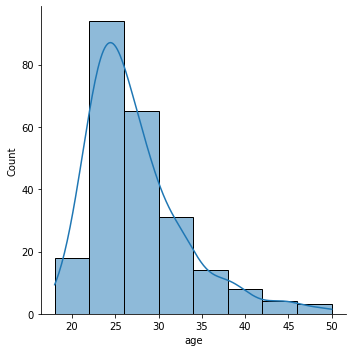

In [34]:
bins = 8
sns.displot(final_DFg['age'],bins = bins,kde = True)

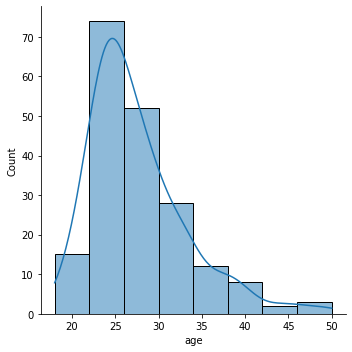

In [35]:
sns.displot(final_DFg[final_DFg['gender']== 'male'].age, bins = bins,kde = True)

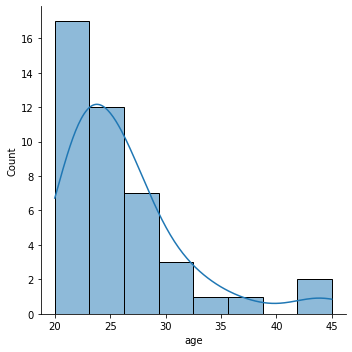

In [36]:
sns.displot(final_DFg[final_DFg['gender']== 'female'].age,bins= bins,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

Data are not normal but the size of the sample is enougth to realize an one sample t-test "two-sided".

In [37]:
# H0 : Mu = 24 
# H1 : Mu != 24


stat, p = stats.ttest_1samp(final_DF.age.dropna(), popmean=24, alternative="two-sided")
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('ho mu=24 (fail to reject H0)')
else:
	print('h1 mu!= 24 (reject H0)')

Statistics=9.03, p=0.00
h1 mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [38]:
#here your codes


moycc = final_DF[["age", "Communication Channels"]].groupby("Communication Channels").mean()

print("Table of average age by Communication channels")
print(moycc.sort_values("age", axis=0))
#pd.sorted()



Table of average age by Communication channels
                               age
Communication Channels            
unknown                  22.000000
Instagram                24.600000
ESIH                     24.875000
Bootcamp Alumni          26.285714
Ayiti Analytics Website  27.000000
Friend                   27.000000
Facebook                 27.513514
WhatsApp                 27.836066
other                    28.444444
LinkedIn                 30.214286


### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Boxplot of applicants by communication channels')

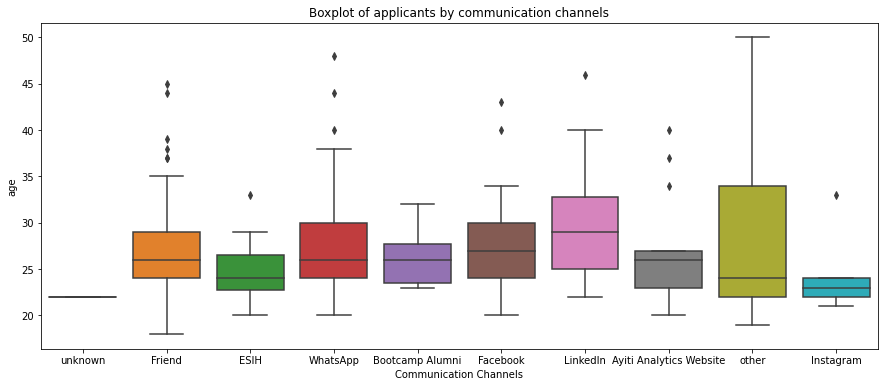

In [39]:
#here your codes

plt.figure(figsize=(15,6))
sns.boxplot(data=final_DF,x="Communication Channels",y="age")
plt.title('Boxplot of applicants by communication channels')

### 7 .Is there a significant age difference between these groups

The data are not normal, we can't do an ANOVA test but the code to do this will be excecuted below:

In [40]:
#here your codes
ccList = list(final_DF["Communication Channels"].unique())

cat = [final_DF[final_DF["Communication Channels"] == i].age.dropna() for i in ccList]


stat, p = stats.f_oneway(cat[0], cat[1], cat[2], cat[3], cat[4], cat[5], cat[6], cat[7], cat[8], cat[9])
print(p)
if p < 0.05:
 print("Null Hypothesis Rejected")
else:
 print("Null Hypothesis Failed to be Rejected")


0.3090300736937847
Null Hypothesis Failed to be Rejected


### 8.Plan a BA strategy for each communication channel regarding the age group

In [41]:
#here your codes

#



### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [42]:
#here your codes

tab0 = final_DF[final_DF["gender"]=="female"]["Communication Channels"]
tab0.value_counts(normalize=1)




Friend                     0.234043
WhatsApp                   0.191489
Bootcamp Alumni            0.170213
Facebook                   0.127660
ESIH                       0.106383
Ayiti Analytics Website    0.085106
other                      0.042553
Instagram                  0.021277
LinkedIn                   0.021277
Name: Communication Channels, dtype: float64

### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [43]:
#here your codes

tab0 = final_DF[final_DF["gender"]=="male"]["Communication Channels"]
tab0.value_counts(normalize=1)

WhatsApp                   0.280788
Friend                     0.275862
Facebook                   0.167488
LinkedIn                   0.068966
ESIH                       0.064039
Ayiti Analytics Website    0.054187
other                      0.034483
Bootcamp Alumni            0.029557
Instagram                  0.019704
unknown                    0.004926
Name: Communication Channels, dtype: float64

### 11. Deduce the probability of being a woman knowing each communication channel

In [44]:
#here your codes

prob11l = []
for _ in ccList:
    if _ != "unknown":
        tab1 = final_DF[final_DF["Communication Channels"]== _]["gender"]
        tt = tab1.value_counts(normalize = 1)
        tt = tt.to_frame(name = "Hear_AA")
        val = tt.loc["female", "Hear_AA"]
        prob11l.append(val)
        print("The probability of being a woman knowing the Communication Channels is {}, is {}".format(_, val))

print("The probability of being a woman knowing the Communication Channels is unknown is 0")



The probability of being a woman knowing the Communication Channels is Friend, is 0.16417910447761194
The probability of being a woman knowing the Communication Channels is ESIH, is 0.2777777777777778
The probability of being a woman knowing the Communication Channels is WhatsApp, is 0.13636363636363635
The probability of being a woman knowing the Communication Channels is Bootcamp Alumni, is 0.5714285714285714
The probability of being a woman knowing the Communication Channels is Facebook, is 0.15
The probability of being a woman knowing the Communication Channels is LinkedIn, is 0.06666666666666667
The probability of being a woman knowing the Communication Channels is Ayiti Analytics Website, is 0.26666666666666666
The probability of being a woman knowing the Communication Channels is other, is 0.2222222222222222
The probability of being a woman knowing the Communication Channels is Instagram, is 0.2
The probability of being a woman knowing the Communication Channels is unknown is 0


### 13. Deduce the probability of being a woman knowing each communication channel

### 14. Deduce the probability of being a man knowing each communication channel

In [45]:
#here your codes
for _ in ccList:
    a = ccList.index(_)
    if a !=0:
        p = 1 - prob11l[a-1]
        print("The probability of being a male knowing the Communication Channels is {}, is {}".format(_, p))

print("The probability of being a woman knowing the Communication Channels is unknown is 1")

The probability of being a male knowing the Communication Channels is Friend, is 0.835820895522388
The probability of being a male knowing the Communication Channels is ESIH, is 0.7222222222222222
The probability of being a male knowing the Communication Channels is WhatsApp, is 0.8636363636363636
The probability of being a male knowing the Communication Channels is Bootcamp Alumni, is 0.4285714285714286
The probability of being a male knowing the Communication Channels is Facebook, is 0.85
The probability of being a male knowing the Communication Channels is LinkedIn, is 0.9333333333333333
The probability of being a male knowing the Communication Channels is Ayiti Analytics Website, is 0.7333333333333334
The probability of being a male knowing the Communication Channels is other, is 0.7777777777777778
The probability of being a male knowing the Communication Channels is Instagram, is 0.8
The probability of being a woman knowing the Communication Channels is unknown is 1


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

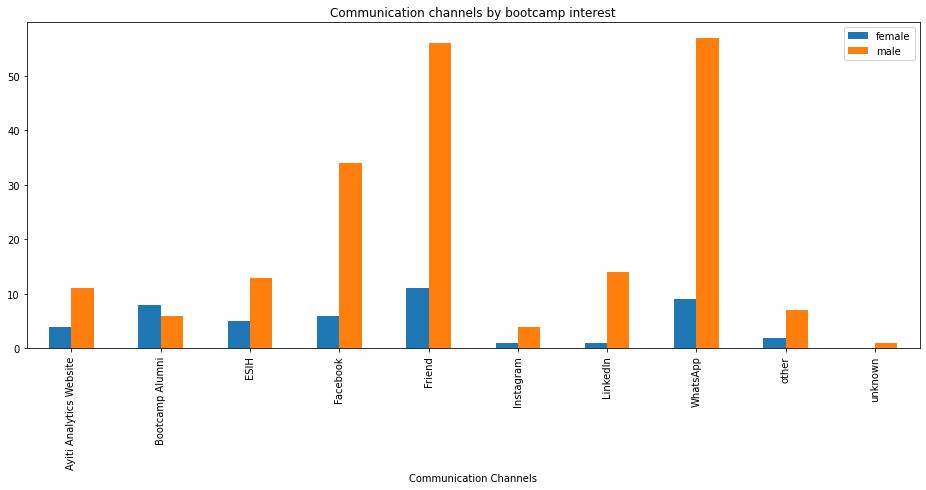

We perform a test of khi-square on the variable Communication Channels and gender.
we find out that 0.010697487425548971 is smaller than 0.05
we can therefore conclude that the association between the variables Communication Channels and gender is statistically significant.


In [51]:
def graph_and_test(data=final_DF, col1="", col2="", graph_title ="Communication channels by gender", l=(12,6)):
    graph_tab = pd.crosstab(data[col1], final_DF[col2], margins = True)
    graph_tab.iloc[:-1,:-1].plot.bar(figsize=l)
    plt.title(graph_title)
    plt.legend()
    plt.show()
    chi2, pval, dof, expected = stats.chi2_contingency(graph_tab[graph_tab.All>5].iloc[:-1,:-1])
    print(f"We perform a test of khi-square on the variable {col1} and {col2}.")
    if pval<0.05:
        print(f"we find out that {pval} is smaller than 0.05")
        print(f"we can therefore conclude that the association between the variables {col1} and {col2} is statistically significant.")
    else:
        print(f"we find out that {pval} is bigger than 0.05")
        print(f"we can therefore conclude that the association between the variables \n{col1} and {col2} is not statistically significant.")

graph_and_test(col1="Communication Channels", col2="gender", graph_title ="Communication channels by bootcamp interest", l=(16,6))

### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

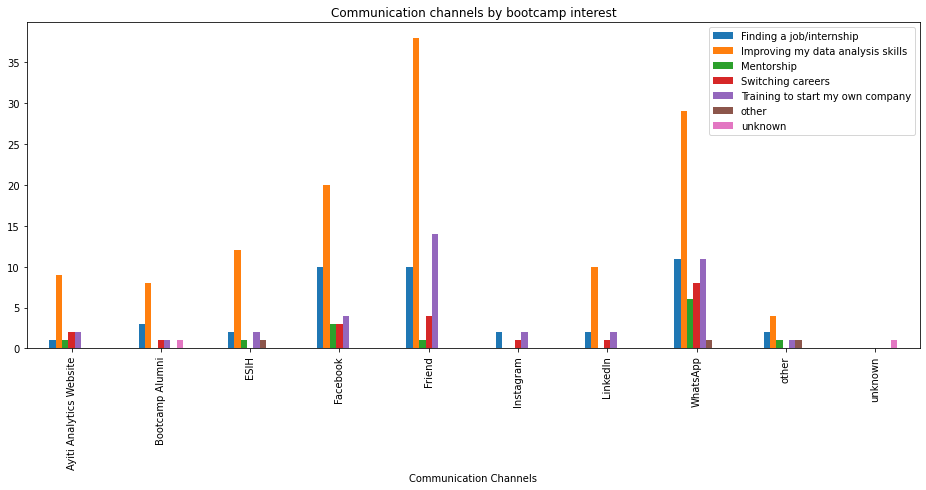

We perform a test of khi-square on the variable Communication Channels and Bootcamp Interest.
we find out that 0.23290336731984587 is bigger than 0.05
we can therefore conclude that the association between the variables 
Communication Channels and Bootcamp Interest is not statistically significant.


In [50]:
# here your codes

# let's perform a chi-square test.
graph_and_test(col1="Communication Channels", col2="Bootcamp Interest", graph_title ="Communication channels by bootcamp interest", l=(16,6))

### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [ ]:
#here your codes

### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

In [ ]:
# here your codes

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [ ]:
n19 = len(final_DF[final_DF["Payed"]=="Yes"])
n19n = 250-n19

In [ ]:
# 

df20 = pd.pivot_table(final_DF[final_DF["Payed"]=="Yes"], values= "quest_id", index=["Bootcamp Interest", "Communication Channels", "gender"], aggfunc="count")
df20=df20/n19
print("Probabilities of a payed applicant by given category of Bootcamp Interest, Communication Channel and gender")
print(df20)

df20n = pd.pivot_table(final_DF[final_DF["Payed"]=="No"], values= "quest_id", index=["Bootcamp Interest", "Communication Channels", "gender"], aggfunc="count")
df20n =df20/n19n
print("Probabilities of a non-payed applicant by given category of Bootcamp Interest, Communication Channel and gender")
print(df20n)

Probabilities of a payed applicant by given category of Bootcamp Interest, Communication Channel and gender
                                                                  quest_id
Bootcamp Interest                 Communication Channels  gender          
Finding a job/internship          Ayiti Analytics Website male    0.015385
                                  Bootcamp Alumni         female  0.015385
                                  ESIH                    male    0.015385
                                  Facebook                male    0.015385
                                  Friend                  female  0.015385
                                                          male    0.030769
                                  Instagram               male    0.015385
                                  LinkedIn                male    0.015385
                                  WhatsApp                female  0.015385
                                                          male    0

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [ ]:
final_DF["Bootcamp Interest"].unique()


array(['unknown', 'Finding a job/internship',
       'Improving my data analysis skills', 'Mentorship',
       'Training to start my own company', 'Switching careers', 'other'],
      dtype=object)

In [ ]:
# here your codes
df19 = final_DF[(final_DF["Bootcamp Interest"]=="Improving my data analysis skills") & (final_DF["Communication Channels"] == "Friend") & (final_DF["gender"]=="male")]

l19 = df19["Payed"].value_counts(normalize=1)

l19.rename(index={"Yes": "Probability that the applicant pays knowing he wants to improve her skills, he is a male, and he is invited by a Friend",
'No': "Probability that the applicant doesn't pay knowing he wants to improve her skills, he is a male, and he is invited by a Friend"}, inplace=True)
l19


Probability that the applicant doesn't pay knowing he wants to improve her skills, he is a male, and he is invited by a Friend    0.5625
Probability that the applicant pays knowing he wants to improve her skills, he is a male, and he is invited by a Friend           0.4375
Name: Payed, dtype: float64

### Based on these findings, propose strategies to increase our sales?

In [ ]:
#here your codes